In [ ]:
#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Now I will take the input
train_df = pd.read_csv('train_dataset_final1.csv')
valid_df = pd.read_csv('validate_dataset_final.csv')

print("Size Training Data:", train_df.shape)
print("Size Validation Data:", valid_df.shape)



Size Training Data: (25247, 27)
Size Validation Data: (5016, 26)


In [ ]:
train_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [ ]:
train_df['next_month_default'].value_counts(normalize=True)

,proportion
next_month_default,
0,0.809601
1,0.190399


In [ ]:
#Checking for missing values
train_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [ ]:
#Calculating Percentage age missing
100*train_df['age'].isnull().sum()/len(train_df)

np.float64(0.4990691963401592)

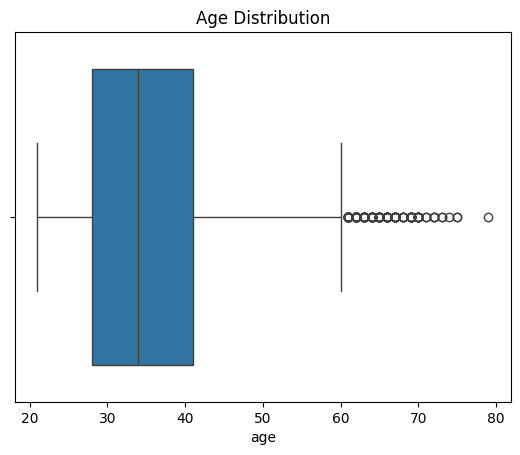

In [ ]:
#As it is very small we can do either options deleting those rows or filling with mean,median
#Visualising the age in dataset
sns.boxplot(data=train_df, x='age')
plt.title('Age Distribution')
plt.show()

In [ ]:
#Since we are having Outliers Here so We will not replace in with mean
# we will replace all the missing values will median
train_df['age'].fillna(train_df['age'].median(), inplace=True)

<ipython-input-9-1917885667>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['age'].fillna(train_df['age'].median(), inplace=True)


In [ ]:
#EDA Part

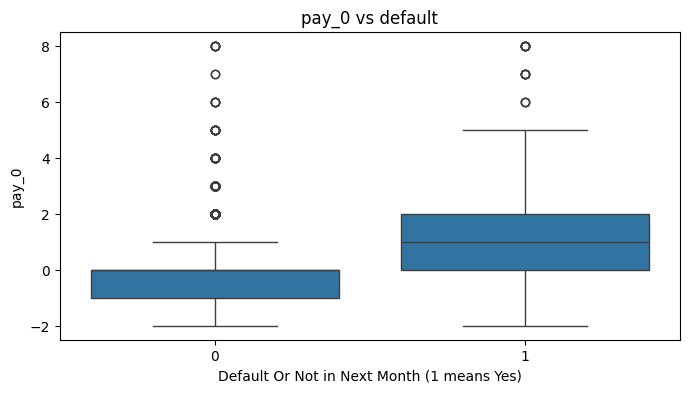

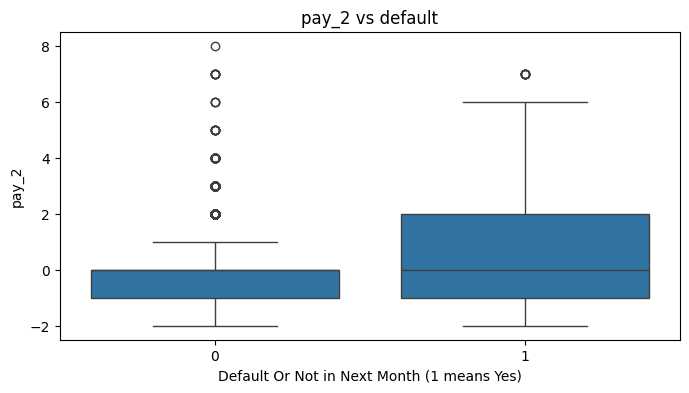

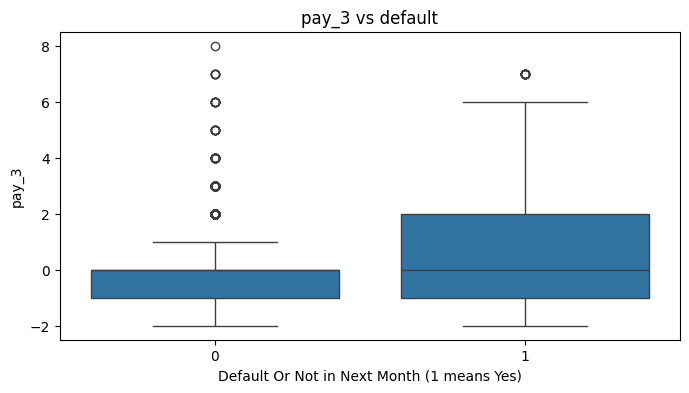

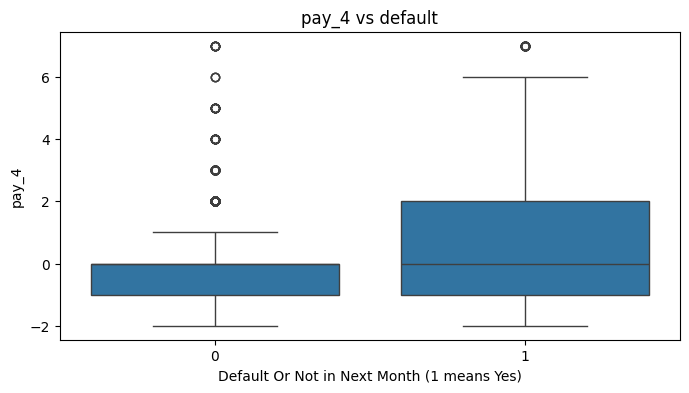

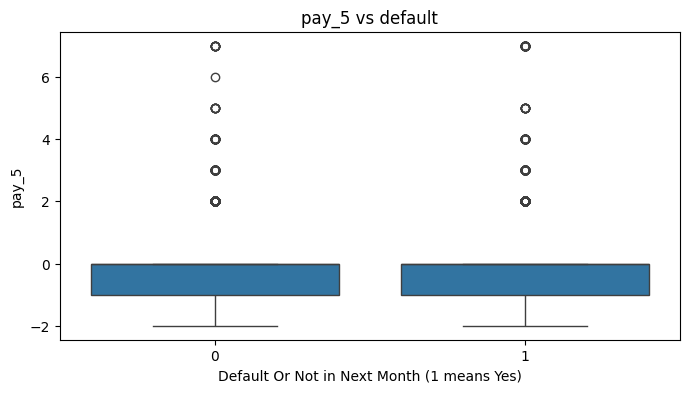

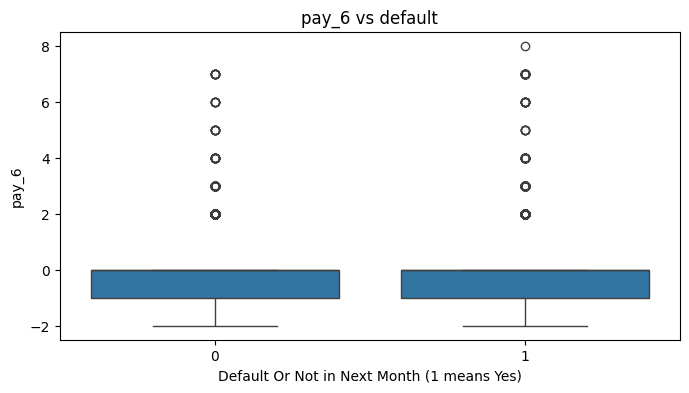

In [ ]:
pay_cols = ['pay_0','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in pay_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='next_month_default', y=col, data=train_df)
    plt.title(f'{col} vs default')
    plt.xlabel('Default Or Not in Next Month (1 means Yes)')
    plt.ylabel(col)
    plt.show()

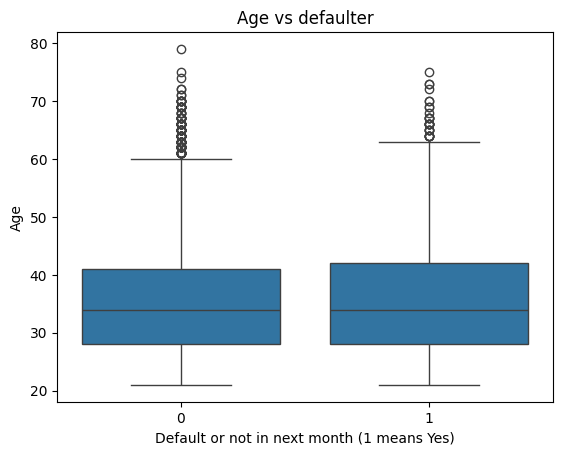

In [ ]:
sns.boxplot(data=train_df, x='next_month_default', y='age')
plt.title('Age vs defaulter')
plt.xlabel('Default or not in next month (1 means Yes)')
plt.ylabel('Age')
plt.show()

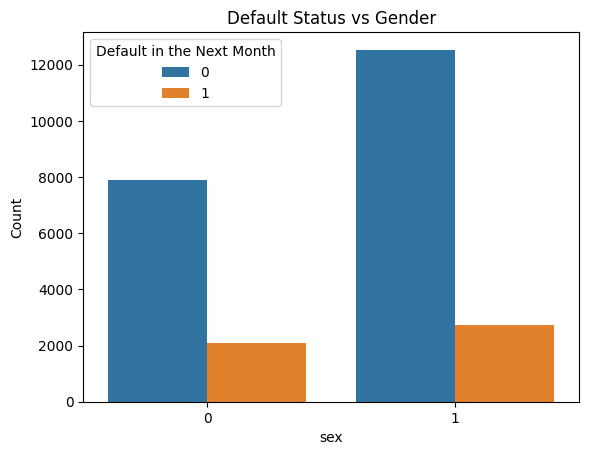

In [ ]:
sns.countplot(x='sex', hue='next_month_default', data=train_df)
plt.title('Default Status vs Gender')
gender_map = {0: "Female", 1: "Male"}
train_df["sex"] = train_df["sex"].map(gender_map)
plt.ylabel('Count')
plt.legend(title='Default in the Next Month')
plt.show()

In [ ]:
# The Proportionality of default in male is slightly lower than that of females as we can see from graph and below as it says 20% male default and 17 percent female default
train_df.groupby('sex')['next_month_default'].mean()

,next_month_default
sex,
Female,0.208604
Male,0.178468


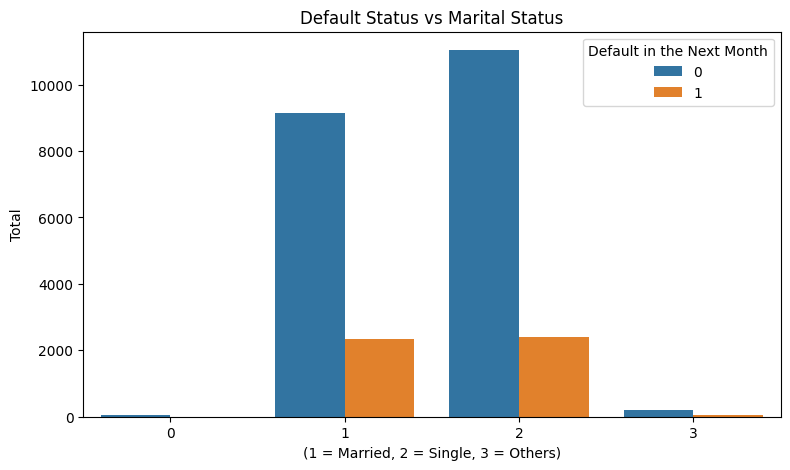

In [ ]:
plt.figure(figsize=(9, 5))
sns.countplot(x='marriage', hue='next_month_default', data=train_df)
plt.title('Default Status vs Marital Status')
plt.xlabel('(1 = Married, 2 = Single, 3 = Others)')
plt.ylabel('Total')
plt.legend(title='Default in the Next Month')
plt.show()

In [ ]:
#As we can see that 0 is nearly negligible so we will combine that with others
train_df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,273
0,53


In [ ]:
train_df['marriage'] = train_df['marriage'].replace({0: 3})

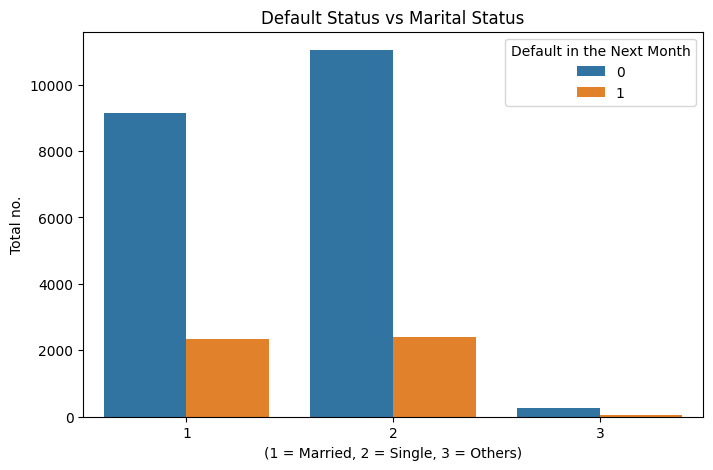

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='marriage', hue='next_month_default', data=train_df)
plt.title('Default Status vs Marital Status')
plt.xlabel('(1 = Married, 2 = Single, 3 = Others)')
plt.ylabel('Total no.')
plt.legend(title='Default in the Next Month')
plt.show()

In [ ]:
 train_df.groupby('marriage')['next_month_default'].mean()

,next_month_default
marriage,
1,0.203746
2,0.178856
3,0.196319


In [ ]:
#So here single are having more default percentage as compare to married and others

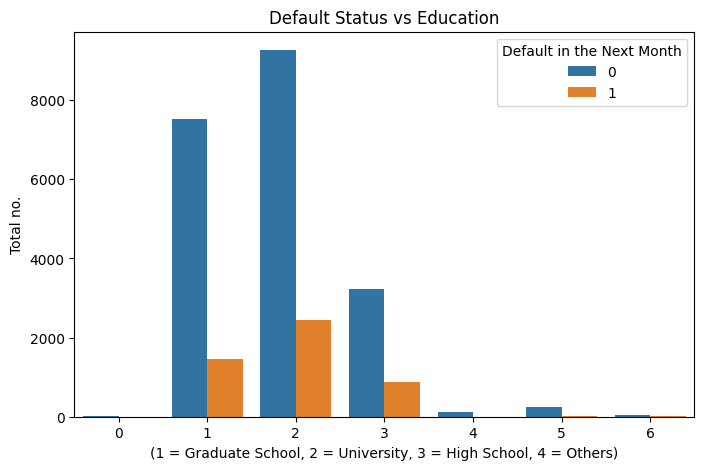

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='education', hue='next_month_default', data=train_df)
plt.title('Default Status vs Education')
plt.xlabel('(1 = Graduate School, 2 = University, 3 = High School, 4 = Others)')
plt.ylabel('Total no.')
plt.legend(title='Default in the Next Month')
plt.show()

In [ ]:
train_df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
5,253
4,116
6,44
0,14


In [ ]:
train_df['education'] = train_df['education'].replace({0: 4, 5: 4, 6: 4})

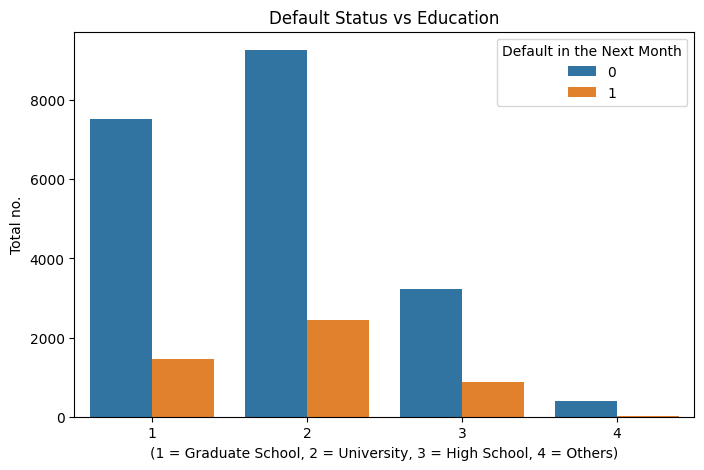

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='education', hue='next_month_default', data=train_df)
plt.title('Default Status vs Education')
plt.xlabel('(1 = Graduate School, 2 = University, 3 = High School, 4 = Others)')
plt.ylabel('Total no.')
plt.legend(title='Default in the Next Month')
plt.show()

In [ ]:
train_df.groupby('education')['next_month_default'].mean()

,next_month_default
education,
1,0.161771
2,0.209098
3,0.213123
4,0.060890


In [ ]:
#So Here Values other than 1 2 3 4 are included in others(4)
#Also default rate high in 2(University) and 3(High School) and slightly low in 1(University)

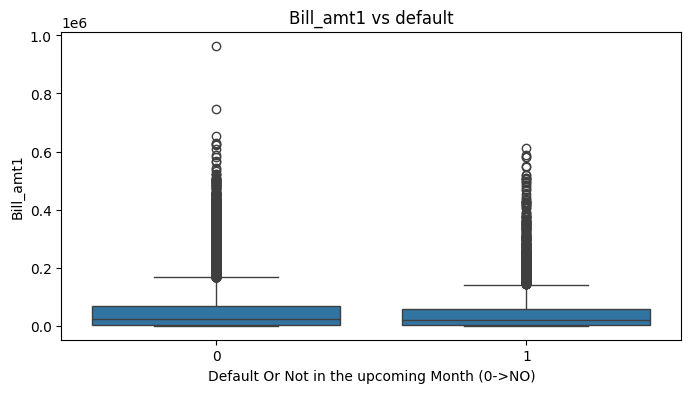

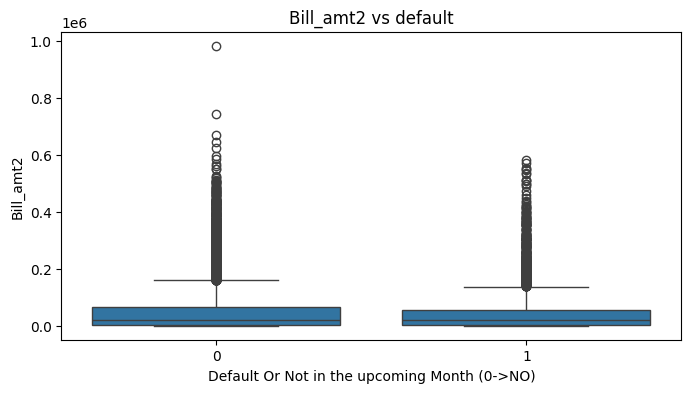

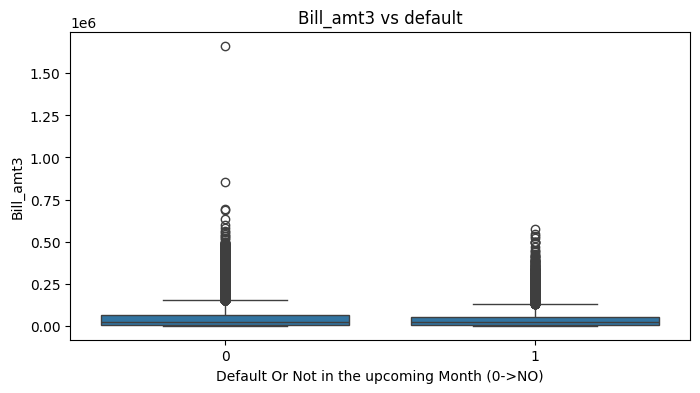

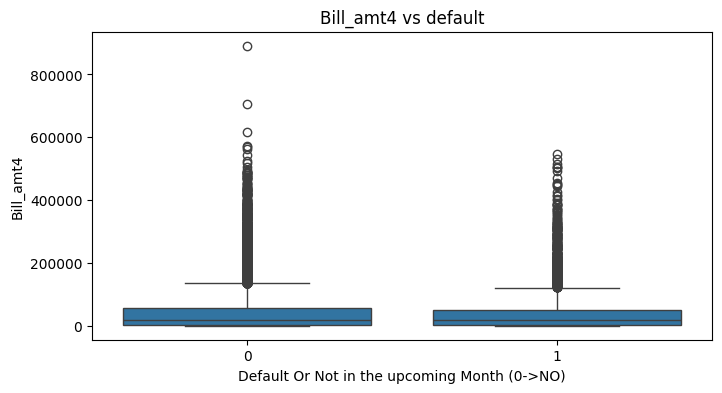

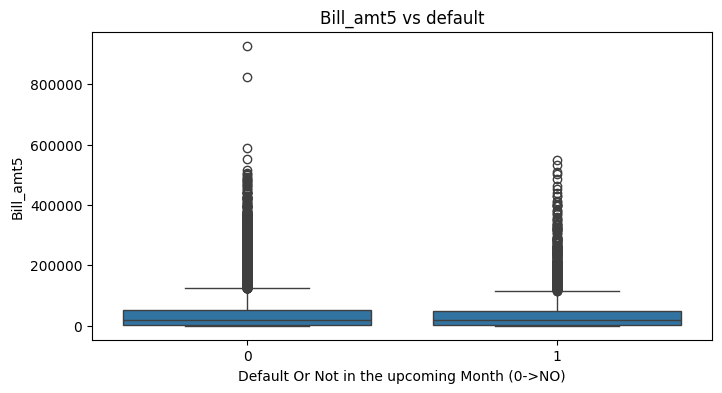

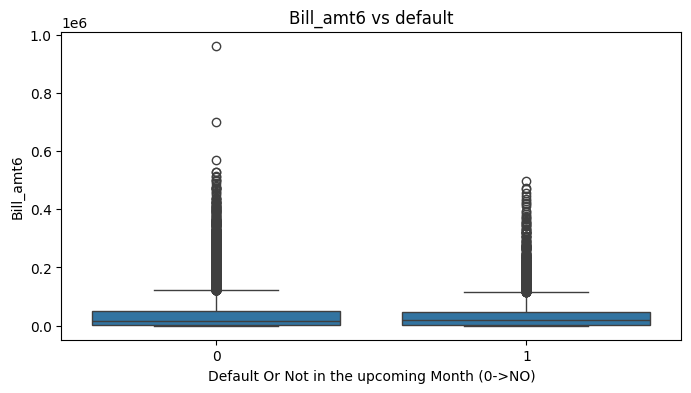

In [ ]:
Bill_cols = ['Bill_amt1','Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']

for col in Bill_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='next_month_default', y=col, data=train_df)
    plt.title(f'{col} vs default')
    plt.xlabel('Default Or Not in the upcoming Month (0->NO)')
    plt.ylabel(col)
    plt.show()

In [ ]:
# Observation:
# Bill amounts are quite spread out for both groups.
# There's no differentiator in bill amounts between defaulters and non-defaulters.
# This might mean bill amount could help when combined with other features.

Text(0.5, 1.0, ' Default Status vs Credit limit')

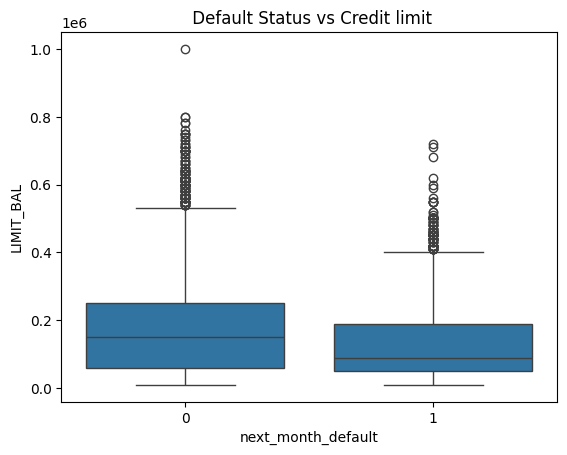

In [ ]:
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=train_df)
plt.title(" Default Status vs Credit limit")

In [ ]:
#More limit less chance of defaulting and vice versa

In [ ]:
#So Now we will start with the feature engineering part

In [ ]:
# Used Ratio: how much of credit limit is used by the customer i.e Utilization Ratio
train_df['used_ratio'] = train_df['AVG_Bill_amt'] / train_df['LIMIT_BAL']
valid_df['used_ratio'] = valid_df['AVG_Bill_amt'] / valid_df['LIMIT_BAL']

In [ ]:
# average delay
pay_status_columns = [f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]
train_df['pay_mean_status'] = train_df[pay_status_columns].mean(axis=1)
valid_df['pay_mean_status'] = valid_df[pay_status_columns].mean(axis=1)

# Number of months with delayed payments
train_df['delayed_months'] = (train_df[pay_status_columns] >= 1).sum(axis=1)
valid_df['delayed_months'] = (valid_df[pay_status_columns] >= 1).sum(axis=1)

In [ ]:
train_df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,used_ratio,pay_mean_status,delayed_months
0,5017,2,Female,2,60000,25.0,2,2,2,0,...,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0,0.691858,1.000000,3
1,5018,2,Male,1,290000,24.0,0,0,-2,-2,...,0.00,2700.10,0.00,1349.72,2534.50,0.27,0,0.008740,-0.833333,0
2,5019,1,Female,2,180000,63.0,0,0,0,0,...,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0,0.280122,0.000000,0
3,5020,1,Male,2,210000,43.0,0,0,0,0,...,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0,0.410617,0.000000,0
4,5021,2,Female,1,280000,32.0,-2,-2,-2,-2,...,45027.78,2100.09,0.01,0.27,11814.33,0.72,0,0.042194,-2.000000,0


In [ ]:
# Some of these columns are super skewed, so applying log helps smooth them out.
# Using np.log1p handles zero values safely, so we don't run into math issues.
# This makes the data easier for models like logistic regression or decision trees to work with.
Bill_cols = ['Bill_amt1','Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
for col in Bill_cols:
    train_df[f'log_{col}'] = np.log1p(train_df[col])
    valid_df[f'log_{col}'] = np.log1p(valid_df[col])

train_df[[f'log_{col}' for col in Bill_cols]].head()

,log_Bill_amt1,log_Bill_amt2,log_Bill_amt3,log_Bill_amt4,log_Bill_amt5,log_Bill_amt6
0,11.007500,11.014180,10.941531,10.261267,10.007511,9.940380
1,9.319972,0.000000,0.631272,0.500775,7.901733,7.208822
2,10.777538,10.798001,10.820483,10.834665,10.857143,10.877906
3,11.420300,11.439462,11.414798,11.353889,11.294990,11.250865
4,9.886718,6.907795,8.066986,10.712938,7.650059,0.854415


In [ ]:
log_columns = [f'log_Bill_amt{i}' for i in range(1, 7)]
train_df['avg_log_Bill_amt'] = train_df[log_columns].mean(axis=1)
valid_df['avg_log_Bill_amt'] = valid_df[log_columns].mean(axis=1)

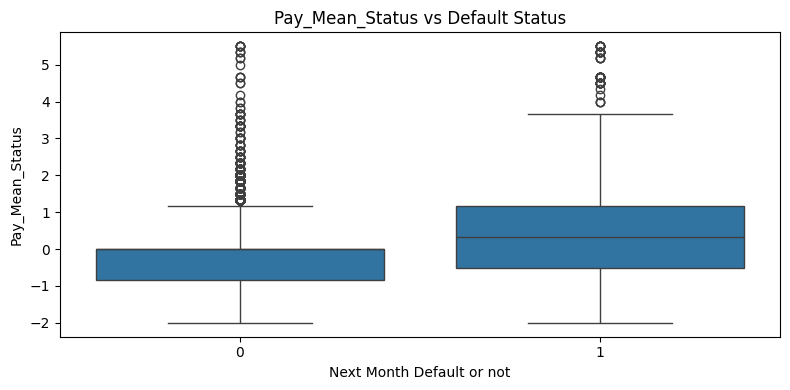

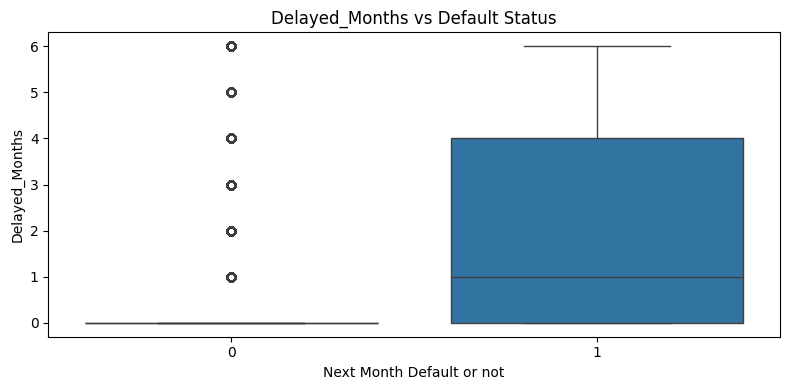

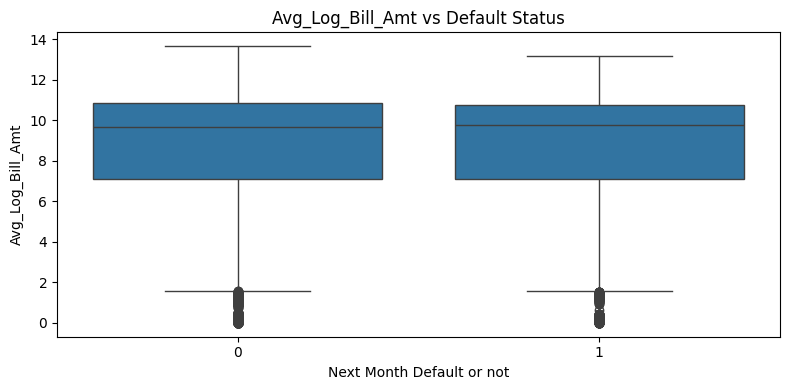

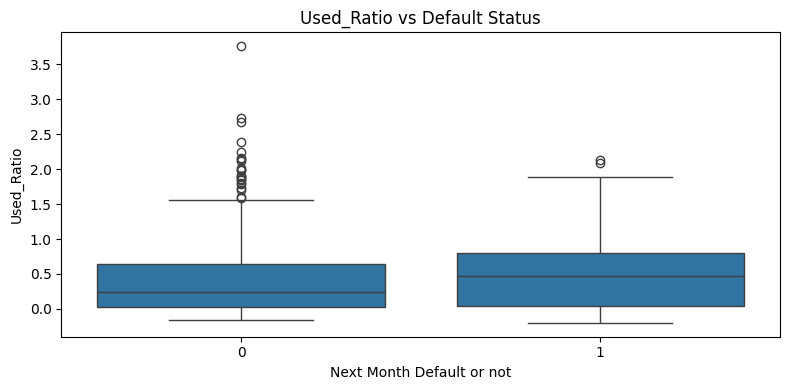

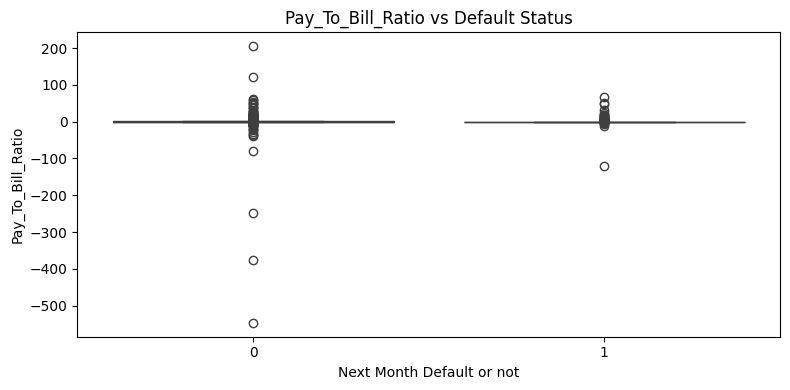

In [ ]:
for col in ['pay_mean_status', 'delayed_months', 'avg_log_Bill_amt', 'used_ratio', 'PAY_TO_BILL_ratio']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='next_month_default', y=col, data=train_df)
    plt.title(f'{col.title()} vs Default Status')
    plt.xlabel("Next Month Default or not")
    plt.ylabel(col.title())
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
# DATA PREPARATION
X = train_df.drop(['Customer_ID', 'next_month_default'], axis=1)
X = X.select_dtypes(include=['number'])
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(X.median(numeric_only=True))
y = train_df['next_month_default'].loc[X.index]
# Scale features before resampling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Resampling
smote = SMOTE(sampling_strategy=0.4, random_state=101)
X_res, y_res = smote.fit_resample(X_scaled, y)

smt_f = SMOTETomek(random_state=42)
X_final, y_final = smt_f.fit_resample(X_res, y_res)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=101)

print("resampling Effect on class distribution", Counter(y_final))
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


resampling Effect on class distribution Counter({0: 20163, 1: 20163})
Training set shape: (32260, 34)
Validation set shape: (8066, 34)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, fbeta_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize Logistic Regression
logreg_model = LogisticRegression(
    max_iter=1500,
    class_weight='balanced',
    random_state=7
)

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_val_scaled)
y_prob_logreg = logreg_model.predict_proba(X_val_scaled)[:, 1]

# Evaluation Metrics
print("\n LOGISTIC REGRESSION PERFORMANCE METRICS ")
print("-" * 50)
print(" Classification Report:\n", classification_report(y_val, y_pred_logreg))
print(" F1 Score     :", round(f1_score(y_val, y_pred_logreg), 4))
print(" F2 Score     :", round(fbeta_score(y_val, y_pred_logreg, beta=2), 4))
print(" ROC AUC Score:", round(roc_auc_score(y_val, y_prob_logreg), 4))
print("-" * 50)



 LOGISTIC REGRESSION PERFORMANCE METRICS 
--------------------------------------------------
 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74      4111
           1       0.75      0.60      0.67      3955

    accuracy                           0.71      8066
   macro avg       0.71      0.70      0.70      8066
weighted avg       0.71      0.71      0.70      8066

 F1 Score     : 0.6664
 F2 Score     : 0.6239
 ROC AUC Score: 0.7697
--------------------------------------------------


In [ ]:
# 📌 MODEL TRAINING (XGBoost)

import xgboost as xgb
from sklearn.metrics import classification_report, f1_score, fbeta_score, roc_auc_score

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=3,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=7
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_val_scaled)
y_prob_xgb = xgb_model.predict_proba(X_val_scaled)[:, 1]

# Evaluation Metrics
print("\n XGBOOST CLASSIFIER PERFORMANCE ")
print("-" * 50)
print(" Classification Report:\n", classification_report(y_val, y_pred_xgb))
print(" F1 Score     :", round(f1_score(y_val, y_pred_xgb), 4))
print(" F2 Score     :", round(fbeta_score(y_val, y_pred_xgb, beta=2), 4))
print(" ROC AUC Score:", round(roc_auc_score(y_val, y_prob_xgb), 4))
print("-" * 50)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:26:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBOOST CLASSIFIER PERFORMANCE 
--------------------------------------------------
 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.06      0.11      4111
           1       0.50      0.99      0.67      3955

    accuracy                           0.52      8066
   macro avg       0.72      0.53      0.39      8066
weighted avg       0.72      0.52      0.39      8066

 F1 Score     : 0.6698
 F2 Score     : 0.8332
 ROC AUC Score: 0.6821
--------------------------------------------------


<ipython-input-41-2003198219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


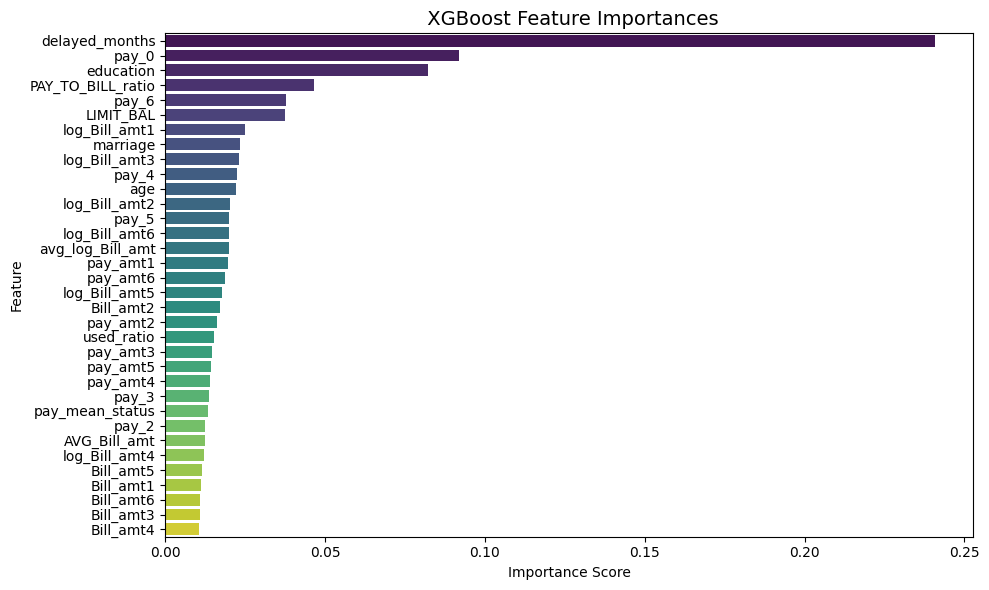

In [ ]:
# Extract feature importances
feature_importance_values = xgb_model.feature_importances_
feature_names = X.columns

# Create DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_values
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette='viridis'
)

plt.title(" XGBoost Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, fbeta_score, roc_auc_score

# Train Decision Tree model
dt_model = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=123
)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_val_scaled)
y_prob_dt = dt_model.predict_proba(X_val_scaled)[:, 1]

# Evaluation Metrics
print("\n DECISION TREE CLASSIFIER RESULTS")
print("-" * 40)
print(" Classification Report:\n", classification_report(y_val, y_pred_dt))
print(" F1 Score:", round(f1_score(y_val, y_pred_dt), 4))
print(" F2 Score:", round(fbeta_score(y_val, y_pred_dt, beta=2), 4))
print(" ROC AUC Score:", round(roc_auc_score(y_val, y_prob_dt), 4))



 DECISION TREE CLASSIFIER RESULTS
----------------------------------------
 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67      4111
           1       0.66      0.69      0.67      3955

    accuracy                           0.67      8066
   macro avg       0.67      0.67      0.67      8066
weighted avg       0.67      0.67      0.67      8066

 F1 Score: 0.6711
 F2 Score: 0.6798
 ROC AUC Score: 0.6923


<ipython-input-43-426536713>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


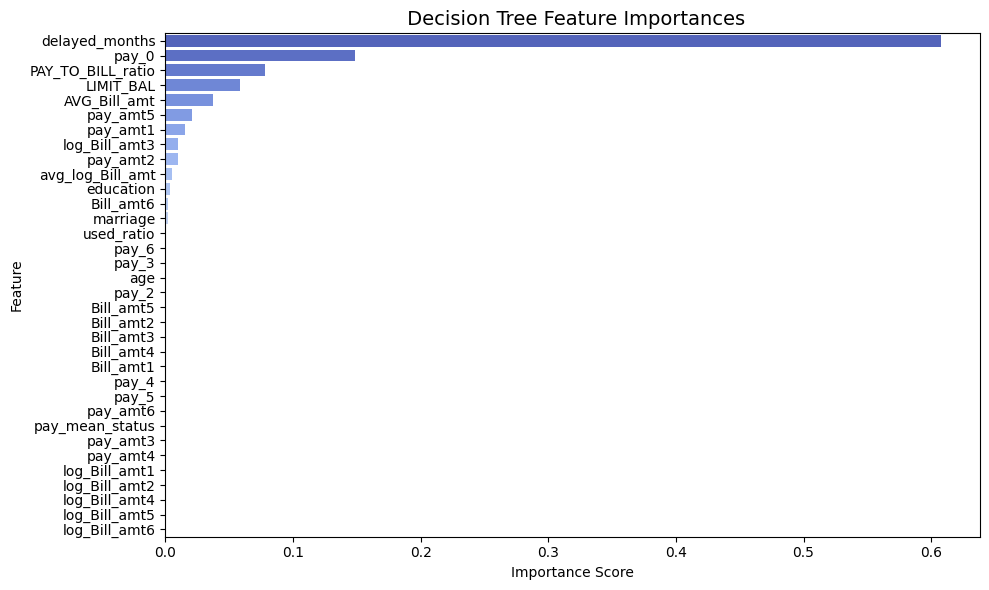

In [ ]:

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=123)
dt_model.fit(X_train, y_train)

# Extract feature importances
dt_importances = dt_model.feature_importances_
feature_names = X.columns

# Create DataFrame
dt_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=dt_importance_df,
    palette='coolwarm'
)

plt.title(" Decision Tree Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, fbeta_score, roc_auc_score

# Initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=123
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_val_scaled)
y_prob_rf = rf_model.predict_proba(X_val_scaled)[:, 1]

# Evaluation results
print("\n RANDOM FOREST CLASSIFIER RESULTS")
print("-" * 40)
print(" Classification Report:\n", classification_report(y_val, y_pred_rf))
print(" F1 Score:", round(f1_score(y_val, y_pred_rf), 4))
print(" F2 Score:", round(fbeta_score(y_val, y_pred_rf, beta=2), 4))
print(" ROC AUC Score:", round(roc_auc_score(y_val, y_prob_rf), 4))



 RANDOM FOREST CLASSIFIER RESULTS
----------------------------------------
 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.56      0.68      4111
           1       0.66      0.91      0.77      3955

    accuracy                           0.73      8066
   macro avg       0.77      0.73      0.72      8066
weighted avg       0.77      0.73      0.72      8066

 F1 Score: 0.7683
 F2 Score: 0.8475
 ROC AUC Score: 0.8476


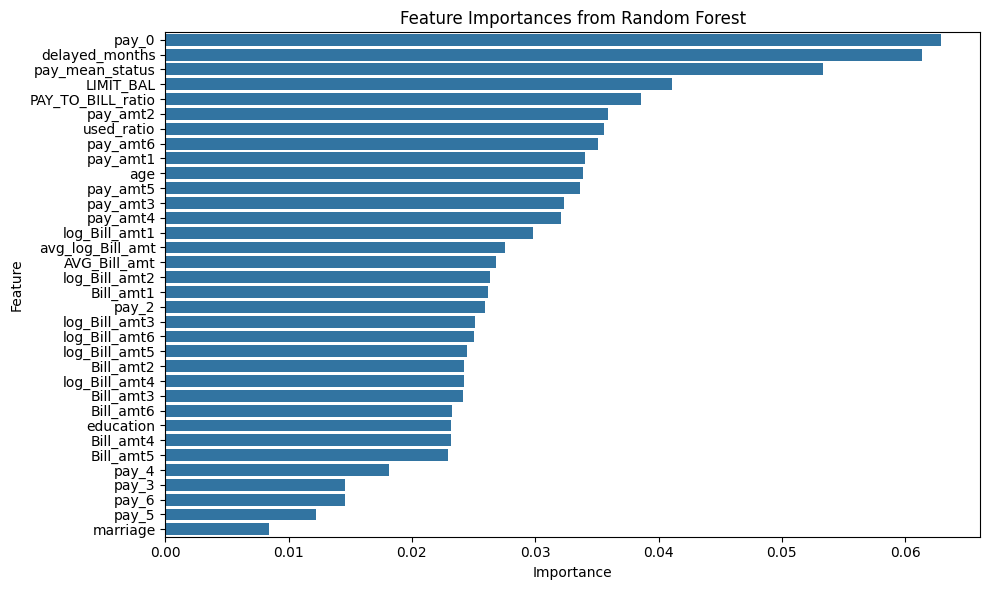

In [ ]:
# Assuming 'X' is your feature dataframe (before scaling)
features = X.columns
importances = rf_model.feature_importances_

# Create a DataFrame for better plotting
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
models = {
    'XGBoost': xgb_model,
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

# Slightly changed thresholds for variety
thresholds = [0.55, 0.45, 0.38, 0.28]

for name, model in models.items():
    y_prob = model.predict_proba(X_val_scaled)[:, 1]
    print(f"\n{name} Model Threshold Tuning:")
    for thresh in thresholds:
        y_pred_thresh = (y_prob >= thresh).astype(int)
        print(f"\nThreshold: {thresh}")
        print(classification_report(y_val, y_pred_thresh, digits=4))
        print(f"ROC AUC Score: {roc_auc_score(y_val, y_prob):.4f}")
        print(f"F1 Score: {f1_score(y_val, y_pred_thresh):.4f}")



XGBoost Model Threshold Tuning:

Threshold: 0.55
              precision    recall  f1-score   support

           0     0.9123    0.0684    0.1272      4111
           1     0.5063    0.9932    0.6707      3955

    accuracy                         0.5218      8066
   macro avg     0.7093    0.5308    0.3989      8066
weighted avg     0.7133    0.5218    0.3937      8066

ROC AUC Score: 0.6821
F1 Score: 0.6707

Threshold: 0.45
              precision    recall  f1-score   support

           0     0.9274    0.0528    0.0999      4111
           1     0.5028    0.9957    0.6682      3955

    accuracy                         0.5151      8066
   macro avg     0.7151    0.5242    0.3840      8066
weighted avg     0.7192    0.5151    0.3785      8066

ROC AUC Score: 0.6821
F1 Score: 0.6682

Threshold: 0.38
              precision    recall  f1-score   support

           0     0.9326    0.0438    0.0836      4111
           1     0.5007    0.9967    0.6666      3955

    accuracy        

In [ ]:
def find_best_threshold(model, X_val_scaled, y_val, metric='f2'):
    y_prob = model.predict_proba(X_val_scaled)[:, 1]
    best_thresh = 0.5
    best_score = 0

    thresholds = np.arange(0.1, 0.9, 0.01)
    for thresh in thresholds:
        y_pred = (y_prob >= thresh).astype(int)
        if metric == 'f1':
            score = f1_score(y_val, y_pred)
        elif metric == 'f2':
            score = fbeta_score(y_val, y_pred, beta=2)
        else:
            raise ValueError("Metric must be 'f1' or 'f2'")

        if score > best_score:
            best_score = score
            best_thresh = thresh

    return best_thresh, best_score

# Find best thresholds for all models based on F2 score
best_thresholds = {}
for name, model in models.items():
    thresh, score = find_best_threshold(model, X_val_scaled, y_val, metric='f2')
    best_thresholds[name] = (thresh, score)
    print(f"{name} - Best Threshold: {thresh:.2f}, Best F2 Score: {score:.4f}")

# Evaluate all models at their best thresholds (F2 optimized)
best_model_name = None
best_model_f2 = 0

for name, model in models.items():
    thresh = best_thresholds[name][0]
    y_prob = model.predict_proba(X_val_scaled)[:, 1]
    y_pred = (y_prob >= thresh).astype(int)

    print(f"\n{name} Evaluation at Best Threshold {thresh:.2f}:")
    print(classification_report(y_val, y_pred, digits=4))
    f1 = f1_score(y_val, y_pred)
    f2 = fbeta_score(y_val, y_pred, beta=2)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"F1 Score: {f1:.4f}")
    print(f"F2 Score: {f2:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    if f2 > best_model_f2:
        best_model_f2 = f2
        best_model_name = name

print(f"\nBest Model Overall Based on F2 Score: {best_model_name} with F2 = {best_model_f2:.4f}")

XGBoost - Best Threshold: 0.64, Best F2 Score: 0.8341
Logistic Regression - Best Threshold: 0.22, Best F2 Score: 0.8328
Decision Tree - Best Threshold: 0.14, Best F2 Score: 0.8279
Random Forest - Best Threshold: 0.44, Best F2 Score: 0.8636

XGBoost Evaluation at Best Threshold 0.64:
              precision    recall  f1-score   support

           0     0.9125    0.0837    0.1533      4111
           1     0.5101    0.9917    0.6737      3955

    accuracy                         0.5289      8066
   macro avg     0.7113    0.5377    0.4135      8066
weighted avg     0.7152    0.5289    0.4084      8066

F1 Score: 0.6737
F2 Score: 0.8341
ROC AUC Score: 0.6821

Logistic Regression Evaluation at Best Threshold 0.22:
              precision    recall  f1-score   support

           0     0.8710    0.1331    0.2309      4111
           1     0.5208    0.9795    0.6801      3955

    accuracy                         0.5481      8066
   macro avg     0.6959    0.5563    0.4555      8066
weigh

In [ ]:
best_threshold = 0.44

# Define feature columns based on training data
feature_columns = X.columns.tolist()

# Prepare validation features
X_valid = valid_df[feature_columns].copy()

# Handle infinite values and missing data
X_valid.replace([np.inf, -np.inf], np.nan, inplace=True)
X_valid.fillna(X_valid.median(numeric_only=True), inplace=True)

# Scale validation features using the scaler fitted on training data
X_valid_scaled = scaler.transform(X_valid)

# Predict probabilities with the chosen final model (Random Forest here)
y_prob_valid = rf_model.predict_proba(X_valid_scaled)[:, 1]

# Apply the optimal threshold
y_pred_valid = (y_prob_valid >= best_threshold).astype(int)

# Create submission DataFrame
submission = pd.DataFrame({
    'Customer_ID': valid_df['Customer_ID'],
    'next_month_default': y_pred_valid
})
submission_filename = "submission_23115049.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission file '{submission_filename}' created successfully.")


Submission file 'submission_23115049.csv' created successfully.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
from google.colab import files
files.download('submission_23115049.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>